In [3]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten

In [1]:
import pandas_datareader as pdr
key=""

In [4]:
df =pd.read_csv(open("/content/clean_final_data.csv", "rb"))

In [5]:
df.head()

,Unnamed: 0,open,high,low,close,volume,date_parsed,cont_len,cont_pol,cont_sent,date_year,date_month,date_day,sent_neg,sent_neu,sent_pos,target_variable
0,0,1358.98,1374.71,1358.98,1368.70,593003200.0,2012-04-11,108.142857,0.01,Positive,2012,4,11,0,0,1,0
1,1,1368.77,1388.13,1368.77,1387.56,547368832.0,2012-04-12,75.000000,0.11,Positive,2012,4,12,0,0,1,1
2,2,1387.61,1387.61,1369.85,1370.26,631237824.0,2012-04-13,73.000000,0.00,Neutral,2012,4,13,0,1,0,0
3,3,1370.27,1379.66,1365.38,1369.57,596952128.0,2012-04-16,188.500000,0.13,Positive,2012,4,16,0,0,1,0
4,4,1369.57,1392.76,1369.57,1390.78,566529216.0,2012-04-17,235.529412,0.10,Positive,2012,4,17,0,0,1,1


In [6]:
df1=df.reset_index()['close']

In [ ]:
df1

0       1368.70
1       1387.56
2       1370.26
3       1369.57
4       1390.78
         ...   
1632    2705.57
1633    2658.69
1634    2641.25
1635    2682.63
1636    2711.74
Name: close, Length: 1637, dtype: float64

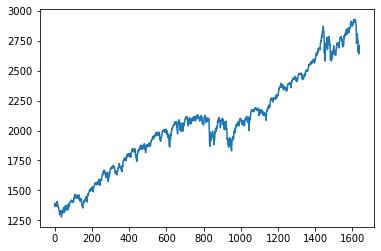

In [7]:
plt.plot(df1)

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [9]:
print(df1)

[[0.05484964]
 [0.06626127]
 [0.05579355]
 ...
 [0.82483209]
 [0.84986991]
 [0.86748351]]


In [10]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [11]:
training_size,test_size

(1064, 573)

In [12]:

train_data

array([[0.05484964],
       [0.06626127],
       [0.05579355],
       ...,
       [0.53677013],
       [0.54273613],
       [0.53877292]])

In [13]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [14]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [15]:
print(X_train.shape), print(y_train.shape)

(963, 100)
(963,)


(None, None)

In [16]:
print(X_test.shape), print(ytest.shape)


(472, 100)
(472,)


(None, None)

In [17]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [18]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [19]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [20]:

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [27]:

model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
16/16 [==============================] - 7s 196ms/step - loss: 0.0444 - val_loss: 0.1033
Epoch 2/100
16/16 [==============================] - 2s 130ms/step - loss: 0.0060 - val_loss: 0.0275
Epoch 3/100
16/16 [==============================] - 2s 129ms/step - loss: 0.0025 - val_loss: 0.0069
Epoch 4/100
16/16 [==============================] - 2s 130ms/step - loss: 0.0011 - val_loss: 0.0015
Epoch 5/100
16/16 [==============================] - 2s 132ms/step - loss: 6.9355e-04 - val_loss: 0.0012
Epoch 6/100
16/16 [==============================] - 2s 132ms/step - loss: 6.7687e-04 - val_loss: 8.4167e-04
Epoch 7/100
16/16 [==============================] - 2s 131ms/step - loss: 6.2126e-04 - val_loss: 0.0015
Epoch 8/100
16/16 [==============================] - 2s 131ms/step - loss: 6.1344e-04 - val_loss: 0.0019
Epoch 9/100
16/16 [==============================] - 2s 129ms/step - loss: 6.7019e-04 - val_loss: 0.0011
Epoch 10/100
16/16 [==============================] - 2s 129ms/step

In [21]:
import tensorflow as tf
tf.__version__

'2.6.0'

In [22]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [23]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [24]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

1247.1857594332084

In [25]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

1212.0651192898727

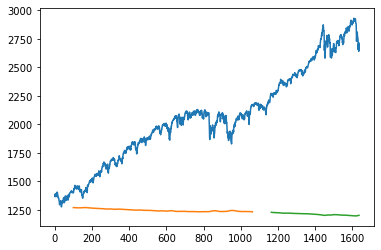

In [29]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

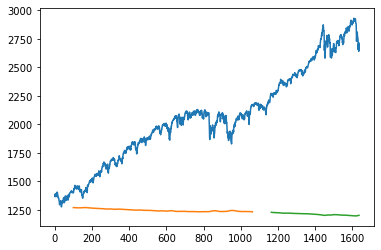

In [28]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [30]:
len(test_data)

573

In [31]:
x_input=test_data[473:].reshape(1,-1)
x_input.shape

(1, 100)

In [32]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [33]:
temp_input

[0.912930356386519,
 0.9061414654807285,
 0.9102922490470138,
 0.9085798995582985,
 0.9050039329581896,
 0.898251346281842,
 0.9011133297029104,
 0.8904882918860049,
 0.893586252798451,
 0.870708537544624,
 0.8743329097839898,
 0.8601561081866038,
 0.8702486839716828,
 0.8714951291825497,
 0.8765414170750891,
 0.8683790161553819,
 0.8825316149331397,
 0.8965753010225692,
 0.9113087674714104,
 0.9171597991165972,
 0.9051673019906818,
 0.9198523628002662,
 0.921679675682217,
 0.9199370726689657,
 0.9266654565256853,
 0.9303382344043081,
 0.9236037998426816,
 0.9219943123373873,
 0.925110425364555,
 0.9332304713499122,
 0.9487626308464936,
 0.9435408725116476,
 0.9322744599745871,
 0.9224602166152356,
 0.9307436316330853,
 0.9289707750952987,
 0.937357052096569,
 0.94530162763962,
 0.9513825860712772,
 0.9562534035215102,
 0.9557996006534759,
 0.9533067102317418,
 0.9410237792702851,
 0.9341562292007017,
 0.9450656501482422,
 0.9320021782537664,
 0.9455073516064623,
 0.951219217038785,
 0

In [34]:
# demonstrate prediction for next 30 days


lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.79301894]
101
1 day input [0.90614147 0.91029225 0.9085799  0.90500393 0.89825135 0.90111333
 0.89048829 0.89358625 0.87070854 0.87433291 0.86015611 0.87024868
 0.87149513 0.87654142 0.86837902 0.88253161 0.8965753  0.91130877
 0.9171598  0.9051673  0.91985236 0.92167968 0.91993707 0.92666546
 0.93033823 0.9236038  0.92199431 0.92511043 0.93323047 0.94876263
 0.94354087 0.93227446 0.92246022 0.93074363 0.92897078 0.93735705
 0.94530163 0.95138259 0.9562534  0.9557996  0.95330671 0.94102378
 0.93415623 0.94506565 0.93200218 0.94550735 0.95121922 0.9554063
 0.95898227 0.95829249 0.95536395 0.96607975 0.97942155 0.97989351
 0.98988927 0.98207781 0.98231379 0.97940945 0.97449628 0.96811279
 0.96425849 0.96755612 0.97406668 0.9746899  0.98392328 0.98440733
 0.97461729 0.98400194 0.98620439 1.         0.99934652 0.9931143
 0.99080898 0.98500635 0.98986507 0.98985297 0.99627277 0.99557088
 0.99682943 0.98236825 0.97266292 0.97197313 0.9694984  0.91222242
 0.87754583 0.90099837 0.89111151 0

In [35]:
day_new=np.arange(1,101)
day_pred=np.arange(1,131)

In [36]:
import matplotlib.pyplot as plt
len(df1)

1637

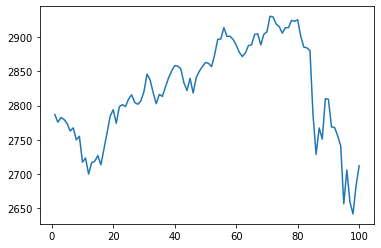

In [40]:
plt.plot(day_new,scaler.inverse_transform(df1[1537:]))


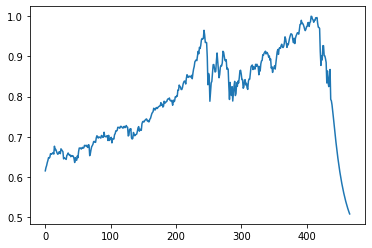

In [39]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

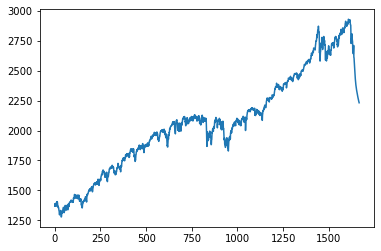

In [ ]:
df3=scaler.inverse_transform(df3).tolist()
plt.plot(df3)